In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nn import NeuralNetwork
from utils.normalizador import Normalizador
from utils.spliter import Splitter
from sklearn.metrics import confusion_matrix, accuracy_score

# Definir a seed para reprodutibilidade
SEED = 44
np.random.seed(SEED)

In [2]:
# Ler o dataset e definir os nomes das colunas
dataset = pd.read_excel("dadosmamografia.xlsx")
colunas = ['x1', 'x2', 'x3', 'x4', 'x5', 'y']
dataset.columns = colunas

# Criar uma instância da classe Normalizador
normalizador = Normalizador()

# Normalizar os dados
dataset_normalizado = normalizador.normaliza(dataset.values)
dataset_normalizado = pd.DataFrame(dataset_normalizado, columns=colunas)

# Separar o dataset (60% treino, 20% teste, 20% validação)
splitter = Splitter(dataset_normalizado)
treino, teste, validacao = splitter.split_data(0.6, 0.2, 0.2)

# Separar as entradas (X) e saídas (y) do conjunto de treino, teste e validação
X_treino = treino[['x1', 'x2', 'x3', 'x4', 'x5']].values
y_treino = treino[['y']].values

X_validacao = validacao[['x1', 'x2', 'x3', 'x4', 'x5']].values
y_validacao = validacao[['y']].values

X_teste = teste[['x1', 'x2', 'x3', 'x4', 'x5']].values
y_teste = teste[['y']].values

In [13]:
import time
import pandas as pd

def grid_search(neuronios_list, ativacoes_list, X_treino, y_treino, X_validacao, y_validacao, X_teste, y_teste):
    resultados = []

    for neuronios in neuronios_list:
        for ativacao in ativacoes_list:
            print(f"Treinando com {neuronios} neurônios e ativação {ativacao}...")

            # Criar o modelo com duas camadas escondidas e a função de ativação
            modelo = NeuralNetwork(
                n_entradas=5,
                n_saidas=1,
                n_neuronios_escondidos=neuronios,
                func_ativacao=ativacao,
                seed=SEED
            )

            # Medir o tempo de treinamento
            inicio_tempo = time.time()

            # Treinar o modelo
            modelo.treinar(X_treino, y_treino, X_validacao, y_validacao, epochs=1000, taxa_aprendizagem=0.01, verbose='n')

            fim_tempo = time.time()
            tempo_treino = fim_tempo - inicio_tempo

            # Calcular o MSE e acurácia no conjunto de validação
            mse_validacao = modelo.calcular_mse(X_validacao, y_validacao)
            acuracia_validacao = modelo.calcular_acuracia(X_validacao, y_validacao)

            # Calcular o MSE e acurácia no conjunto de teste
            mse_teste = modelo.calcular_mse(X_teste, y_teste)
            acuracia_teste = modelo.calcular_acuracia(X_teste, y_teste)

            # Armazenar os resultados
            resultados.append({
                'neuronios': neuronios,
                'ativacao': ativacao,
                'mse_validacao': mse_validacao,
                'acuracia_validacao': acuracia_validacao,
                'mse_teste': mse_teste,
                'acuracia_teste': acuracia_teste,
                'tempo_treino': tempo_treino
            })
            print(f"Finalizado, tempo de treino: {round(tempo_treino, 2)} segundos")
            print(f"MSE Teste: {round(mse_teste,2)}, Acurácia Teste: {round(acuracia_teste,2)}")
            print(f"MSE Validação: {round(mse_validacao,2)}, Acurácia Validação: {round(acuracia_validacao,2)}")
            print(" ")

    return pd.DataFrame(resultados)


In [16]:
# Definir os hiperparâmetros
neuronios_list = [2, 8, 16, 32, 64]
ativacoes_list = ['sigmoid', 'relu', 'linear', 'tanh']

# Executar o GridSearch
resultados = grid_search(neuronios_list, ativacoes_list, X_treino, y_treino, X_validacao, y_validacao, X_teste, y_teste)

# Exibir os resultados
print(resultados)

Treinando com 2 neurônios e ativação sigmoid...
Finalizado, tempo de treino: 19.1 segundos
MSE Teste: 0.13, Acurácia Teste: 0.83
MSE Validação: 0.13, Acurácia Validação: 0.81
 
Treinando com 2 neurônios e ativação relu...
Finalizado, tempo de treino: 3.26 segundos
MSE Teste: 0.13, Acurácia Teste: 0.8
MSE Validação: 0.14, Acurácia Validação: 0.81
 
Treinando com 2 neurônios e ativação linear...
Finalizado, tempo de treino: 18.01 segundos
MSE Teste: 0.13, Acurácia Teste: 0.81
MSE Validação: 0.14, Acurácia Validação: 0.81
 
Treinando com 2 neurônios e ativação tanh...
Finalizado, tempo de treino: 0.34 segundos
MSE Teste: 0.15, Acurácia Teste: 0.8
MSE Validação: 0.15, Acurácia Validação: 0.8
 
Treinando com 8 neurônios e ativação sigmoid...
Finalizado, tempo de treino: 15.16 segundos
MSE Teste: 0.13, Acurácia Teste: 0.84
MSE Validação: 0.13, Acurácia Validação: 0.81
 
Treinando com 8 neurônios e ativação relu...
Finalizado, tempo de treino: 0.42 segundos
MSE Teste: 0.13, Acurácia Teste: 0.

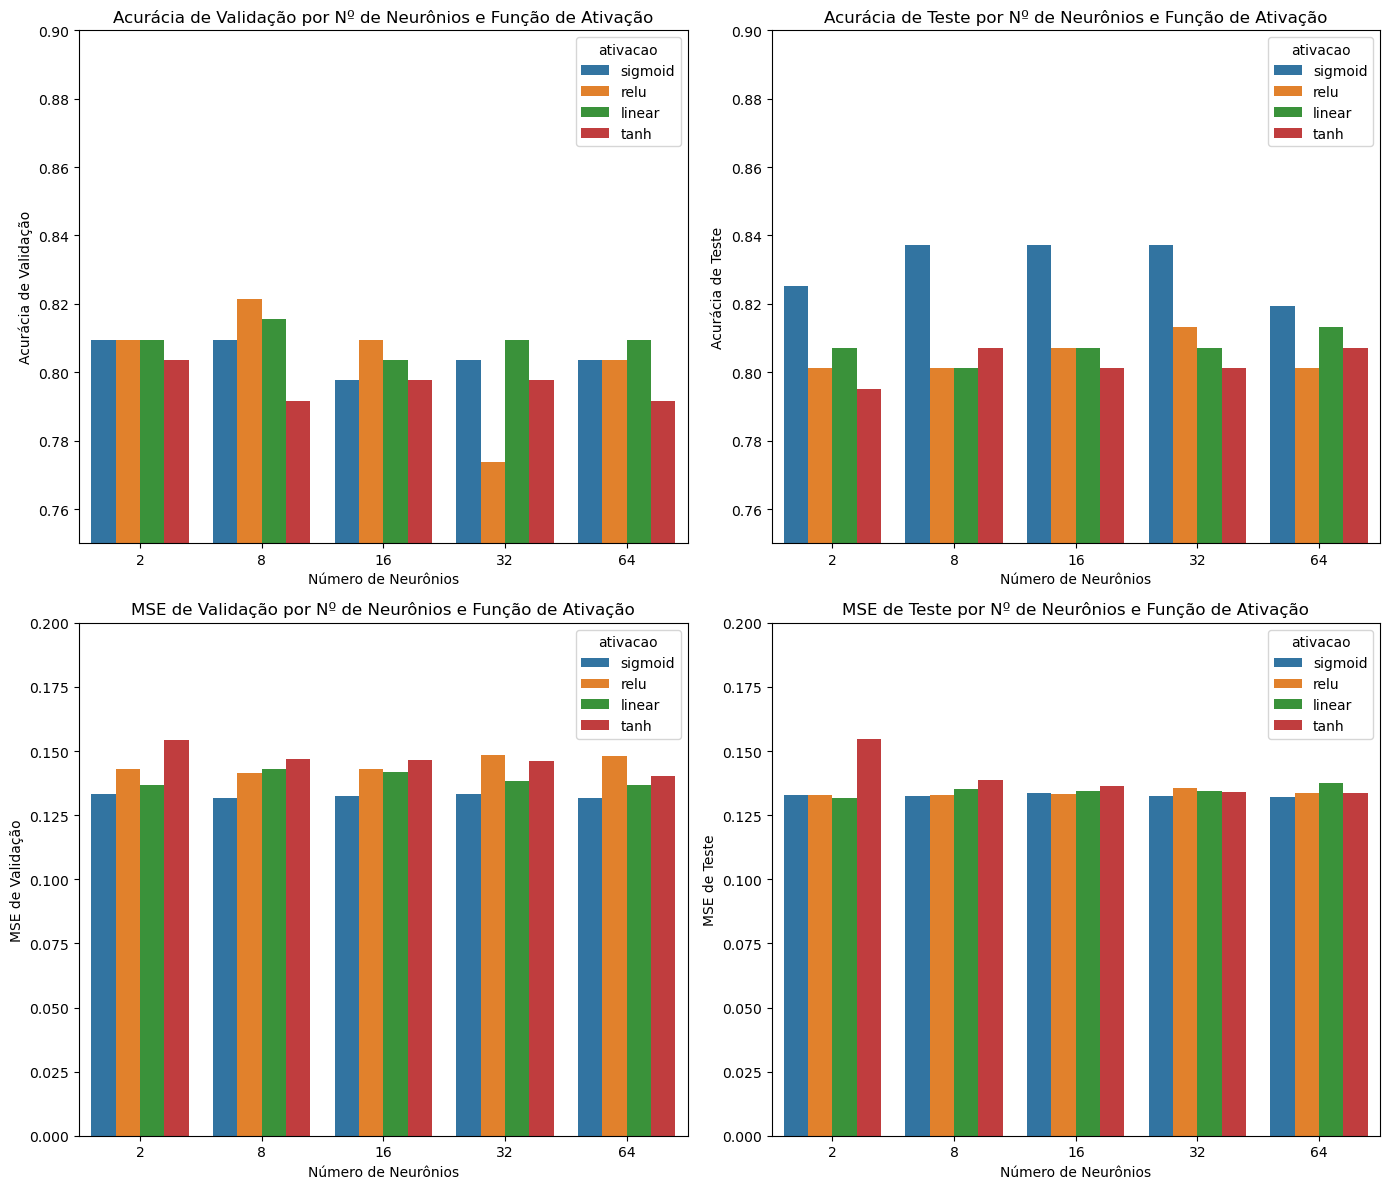

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotar_resultados(resultados, xlim_acuracia=None, ylim_acuracia=None, xlim_mse=None, ylim_mse=None):
    # Criar a figura
    plt.figure(figsize=(14, 12))

    # Plot para Acurácia de Validação
    plt.subplot(2, 2, 1)
    sns.barplot(x='neuronios', y='acuracia_validacao', hue='ativacao', data=resultados)
    plt.title('Acurácia de Validação por Nº de Neurônios e Função de Ativação')
    plt.xlabel('Número de Neurônios')
    plt.ylabel('Acurácia de Validação')

    # Configurar limites dos eixos para o gráfico de Acurácia (se fornecidos)
    if xlim_acuracia:
        plt.xlim(xlim_acuracia)
    if ylim_acuracia:
        plt.ylim(ylim_acuracia)

    # Plot para Acurácia de Teste
    plt.subplot(2, 2, 2)
    sns.barplot(x='neuronios', y='acuracia_teste', hue='ativacao', data=resultados)
    plt.title('Acurácia de Teste por Nº de Neurônios e Função de Ativação')
    plt.xlabel('Número de Neurônios')
    plt.ylabel('Acurácia de Teste')

    # Configurar limites dos eixos para o gráfico de Acurácia (se fornecidos)
    if xlim_acuracia:
        plt.xlim(xlim_acuracia)
    if ylim_acuracia:
        plt.ylim(ylim_acuracia)

    # Plot para MSE de Validação
    plt.subplot(2, 2, 3)
    sns.barplot(x='neuronios', y='mse_validacao', hue='ativacao', data=resultados)
    plt.title('MSE de Validação por Nº de Neurônios e Função de Ativação')
    plt.xlabel('Número de Neurônios')
    plt.ylabel('MSE de Validação')

    # Configurar limites dos eixos para o gráfico de MSE (se fornecidos)
    if xlim_mse:
        plt.xlim(xlim_mse)
    if ylim_mse:
        plt.ylim(ylim_mse)

    # Plot para MSE de Teste
    plt.subplot(2, 2, 4)
    sns.barplot(x='neuronios', y='mse_teste', hue='ativacao', data=resultados)
    plt.title('MSE de Teste por Nº de Neurônios e Função de Ativação')
    plt.xlabel('Número de Neurônios')
    plt.ylabel('MSE de Teste')

    # Configurar limites dos eixos para o gráfico de MSE (se fornecidos)
    if xlim_mse:
        plt.xlim(xlim_mse)
    if ylim_mse:
        plt.ylim(ylim_mse)

    # Ajustar layout e exibir
    plt.tight_layout()
    plt.show()

# Exemplo de uso:
plotar_resultados(resultados, ylim_acuracia=(0.75, 0.9), ylim_mse=(0, 0.2))


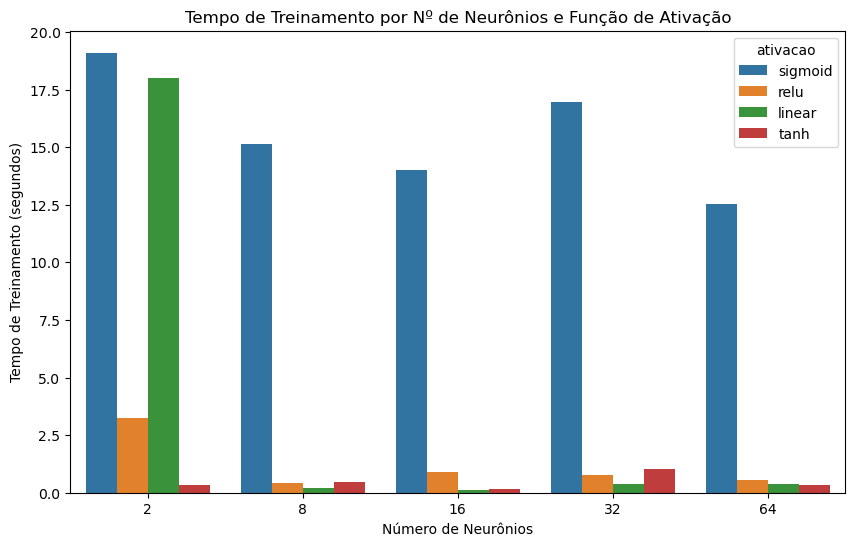

In [18]:
# Plotar o tempo de treinamento
plt.figure(figsize=(10, 6))
sns.barplot(x='neuronios', y='tempo_treino', hue='ativacao', data=resultados)
plt.title('Tempo de Treinamento por Nº de Neurônios e Função de Ativação')
plt.xlabel('Número de Neurônios')
plt.ylabel('Tempo de Treinamento (segundos)')
plt.show()

Melhor combinação: neuronios                    8
ativacao                  relu
mse_validacao         0.141296
acuracia_validacao    0.821429
mse_teste             0.132852
acuracia_teste        0.801205
tempo_treino           0.41788
Name: 5, dtype: object
Acurácia no conjunto de teste: 0.801205


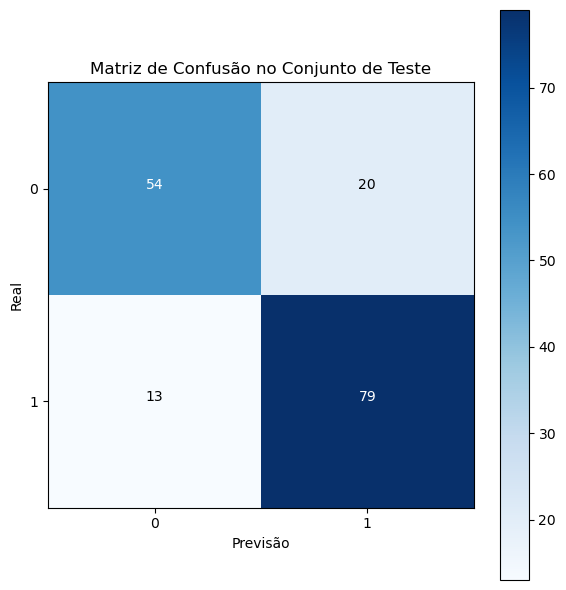

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Selecionar a melhor combinação de parâmetros
melhor_modelo = resultados.loc[resultados['acuracia_validacao'].idxmax()]
print(f"Melhor combinação: {melhor_modelo}")

# Treinar o modelo com os melhores parâmetros
modelo_melhor = NeuralNetwork(
    n_entradas=5,
    n_saidas=1,
    n_neuronios_escondidos=melhor_modelo['neuronios'],
    func_ativacao=melhor_modelo['ativacao'],
    seed=SEED
)

modelo_melhor.treinar(X_treino, y_treino, X_validacao, y_validacao, epochs=1000, taxa_aprendizagem=0.01, verbose='n')

# Fazer previsões no conjunto de teste
previsoes_teste = modelo_melhor.prever(X_teste)
previsoes_binarias = np.where(previsoes_teste >= 0.5, 1, 0)

# Calcular a acurácia no conjunto de teste
acuracia_teste = accuracy_score(y_teste, previsoes_binarias)
print(f"Acurácia no conjunto de teste: {acuracia_teste:.6f}")

# Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, previsoes_binarias)

# Plotar a matriz de confusão usando matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(matriz_confusao, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão no Conjunto de Teste')
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'])
plt.yticks(tick_marks, ['0', '1'])

# Rótulos dos eixos
plt.xlabel('Previsão')
plt.ylabel('Real')

# Adicionar os valores na matriz
thresh = matriz_confusao.max() / 2.
for i, j in np.ndindex(matriz_confusao.shape):
    plt.text(j, i, f'{matriz_confusao[i, j]}',
             horizontalalignment="center",
             color="white" if matriz_confusao[i, j] > thresh else "black")

plt.tight_layout()
plt.show()
